In [1]:
import os.path as osp
import sys
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path(osp.abspath("")).parent))

%config InlineBackend.figure_format='retina'

In [2]:
from core.curve import NURBS
import numpy as np

control_points = np.array([[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0]], dtype=float)
degree = 2
weights = np.array([1, 0.707, 1, 0.707, 1, 0.707, 1, 0.707, 1])
knots = np.array([0, 0, 0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1, 1, 1])
curve = NURBS(control_points, degree, knots, weights)
print(curve)

NURBS curve: 9 control points, degree 2
  control points: [[1.0, 0.0], [1.0, 1.0], [0.0, 1.0], [-1.0, 1.0], [-1.0, 0.0], [-1.0, -1.0], [0.0, -1.0], [1.0, -1.0], [1.0, 0.0]]
  weights: [1.0, 0.707, 1.0, 0.707, 1.0, 0.707, 1.0, 0.707, 1.0]
  knots: [0.   0.   0.   0.25 0.25 0.5  0.5  0.75 0.75 1.   1.   1.  ]
  length: 6.2830997747625315


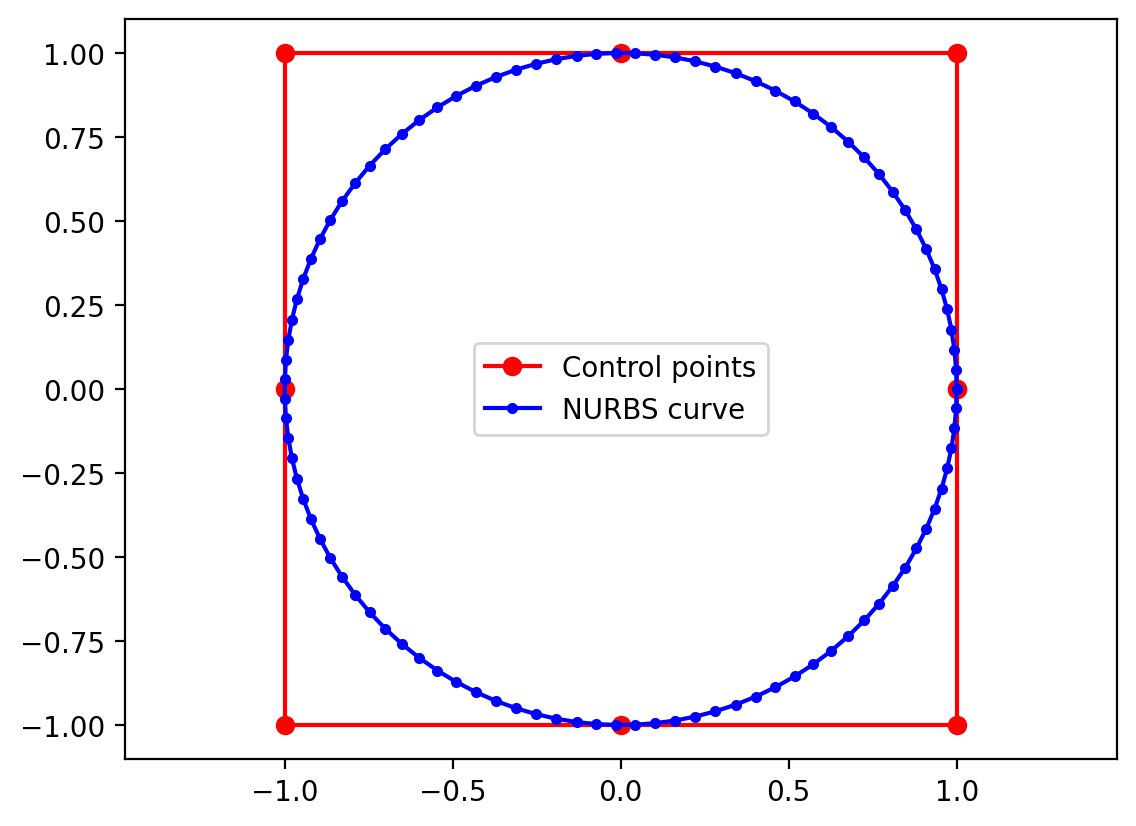

In [3]:
us = np.linspace(0, 1, 100)
points = curve(us)
plt.plot(control_points[:, 0], control_points[:, 1], "ro-", label="Control points")
plt.plot(points[:, 0], points[:, 1], "b.-", label="NURBS curve")
plt.legend()
plt.axis("equal")
plt.show()

NURBS的表达式为
$$
\mathbf{C}(u) = \frac{\sum_{i=0}^{n} N_{i,p}(u) \mathbf{P}_i w_i}{\sum_{i=0}^{n} N_{i,p}(u) w_i}
$$
其一阶导数为
$$
\mathbf{C}'(u) = -\frac{N(u) \cdot W'(u)}{W(u)^2} + \frac{N'(u)}{W(u)}
$$

其中
$$
\mathbf{N}(u) = \sum_{i=0}^{n} N_{i,p}(u) \mathbf{P}_i w_i \qquad W(u) = \sum_{i=0}^{n} N_{i,p}(u) w_i
$$

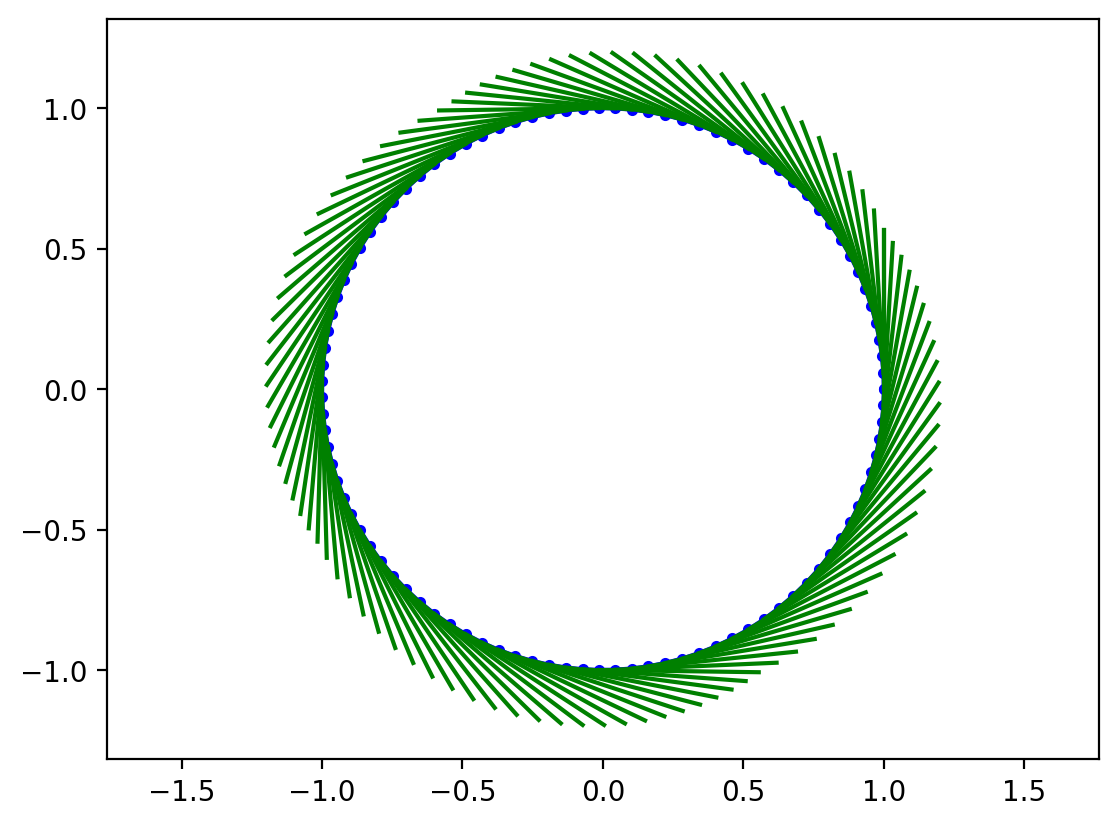

In [4]:
tangent = curve.derivative(us)
plt.plot(points[:, 0], points[:, 1], "b.-", label="NURBS curve")
end_points = points + tangent * 0.1
for start, end in zip(points, end_points):
    plt.plot([start[0], end[0]], [start[1], end[1]], "g-")
plt.axis("equal")
plt.show()

其二阶导数的计算公式为：
$$
\mathbf{C}''(u) = -\frac{N(u) \cdot W''(u)}{W(u)^2} + \frac{2 \cdot N(u) \cdot W'(u)^2}{W(u)^3} + \frac{N''(u)}{W(u)} - \frac{2 \cdot N'(u) \cdot W'(u)}{W(u)^2}
$$

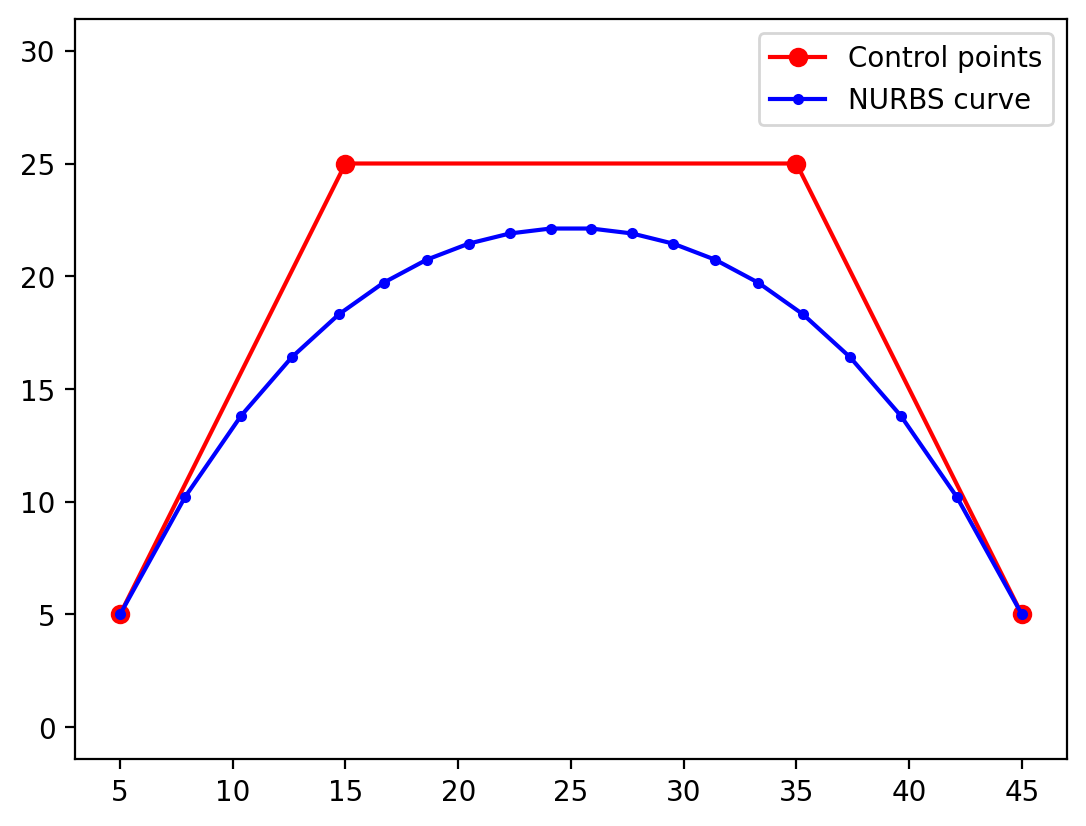

In [5]:
control_points = np.array([[5.0, 5.0], [15.0, 25.0], [35.0, 25.0], [45.0, 5.0]])
weights = np.array([1.0, 2.0, 2.0, 1.0])
degree = 3
knots = np.array([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0])
curve = NURBS(control_points, degree, knots, weights)
plt.plot(control_points[:, 0], control_points[:, 1], "ro-", label="Control points")
us = np.linspace(0, 1, 20)
points = curve(us)
plt.plot(points[:, 0], points[:, 1], "b.-", label="NURBS curve")
plt.legend()
plt.axis("equal")
plt.show()

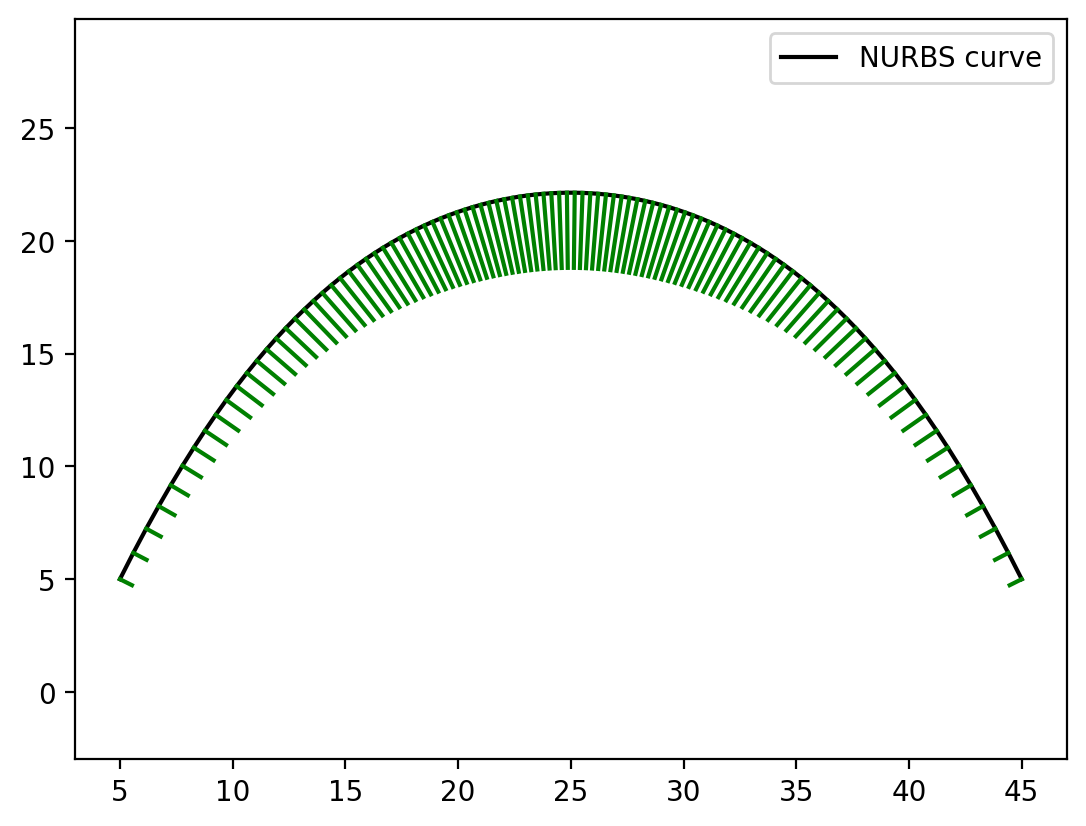

In [6]:
def normalize(v):
    return v / np.linalg.norm(v, axis=1, keepdims=True)


num_points = 100

spline_pts = curve.get_points(num_points)
plt.plot(spline_pts[:, 0], spline_pts[:, 1], "k-", label="NURBS curve")

us = np.linspace(0, 1, num_points)

points = curve(us)
# 切向量
tangents = normalize(curve.derivative(us))
# 法向量
normals = np.stack([-tangents[:, 1], tangents[:, 0]], axis=1)
# 曲率值
curvatures = curve.curvature(us)
amplitude = 50
end_points = points + normals * curvatures[:, np.newaxis] * amplitude

for start, end in zip(points, end_points):
    plt.plot([start[0], end[0]], [start[1], end[1]], "g-")

plt.axis("equal")
plt.legend()
plt.show()